# Crear un conjunto de datos utilizando el siguiente código:

## trX = np.linspace(-1, 1, 101)

## trY = np.linspace(-1, 1, 101)

## for i in range(len(trY)):
##            trY[i] = math.sin(0.2 * trX[i]) + math.exp(-0.7 * trX[i]) + np.random.randn() * 0.033

## Ahora utilizar Theano para obtener los parámetros w_0 y w_1 del modelo correspondiente.

##   y = sin(w_0 * x) + exp(w_1 * x)

In [23]:
%pylab
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import theano
import theano.tensor as T

Using matplotlib backend: Qt5Agg
Populating the interactive namespace from numpy and matplotlib


In [4]:
trX = np.linspace(-1, 1, 101)
trY = np.linspace(-1, 1, 101)

In [6]:
for i in range(len(trY)):
    trY[i] = math.sin(0.2 * trX[i]) + math.exp(-0.7 * trX[i]) + np.random.randn() * 0.033
    print(trY[i])

1.8039942493497643
1.7875421562209506
1.7534693341607035
1.7681979536660286
1.7450015952866067
1.6747730181720037
1.6795072175662775
1.6626606115259621
1.6906529267158648
1.6468359159960295
1.5678020184458017
1.5996517082474784
1.5317436821121155
1.5661474316269814
1.5552597181690142
1.4828360511228467
1.4569006288733828
1.4164717021089115
1.433478995991756
1.4344964516198402
1.3347408467798505
1.3329701898497117
1.3818918295065916
1.3506245229506924
1.3080373394483513
1.2887004750759408
1.3010444269442658
1.2682830167511032
1.2947191173022674
1.2920809840517233
1.2246279943693665
1.2017739542298773
1.2822562204803865
1.2374594555948701
1.132594984645431
1.187449992579897
1.1492839060312094
1.1363509808764944
1.131446781426215
1.0611721860713712
1.1781071977567332
1.0213990783489235
1.1584015299144779
1.0469247320084447
1.0842020570707813
1.0685161116643362
1.0953697025163553
1.0546494490092235
0.9917951746779005
1.012499716596789
0.9634528297822283
1.0377809599954613
0.956953366165768

En el paso 0 el valor de w_0 es -0.1033740112269422 y w_1 es 0.8642012622271497 con un coste 2.5249787539364643
En el paso 1 el valor de w_0 es -0.18928532208586193 y w_1 es 0.7600531201526909 con un coste 1.593039205057267
En el paso 2 el valor de w_0 es -0.26146993358298154 y w_1 es 0.6770886232484679 con un coste 1.0349349717223837
En el paso 3 el valor de w_0 es -0.3226271668279038 y w_1 es 0.6093202875579169 con un coste 0.6840637247457755
En el paso 4 el valor de w_0 es -0.3747960127987528 y w_1 es 0.5529818638916312 con un coste 0.45625164325292233
En el paso 5 el valor de w_0 es -0.4195574096292352 y w_1 es 0.5055391368176602 con un coste 0.30507864499932585
En el paso 6 el valor de w_0 es -0.4581590104268842 y w_1 es 0.4651988849880099 con un coste 0.20331098833060224
En el paso 7 el valor de w_0 es -0.4915987732140075 y w_1 es 0.43064183148356 con un coste 0.13422319552902903
En el paso 8 el valor de w_0 es -0.5206838173394278 y w_1 es 0.40086690486067206 con un coste 0.08717

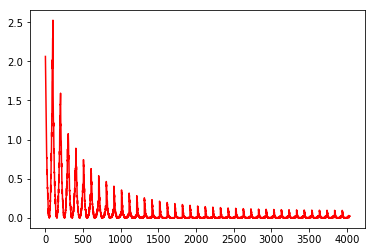

In [41]:
X = T.scalar()
Y = T.scalar()


def model(X, w_0, w_1):
    y = T.sin(w_0 * X) + T.exp(w_1 * X)
    #return c * T.log10(w * X)
    return y

w_0 = theano.shared(np.asarray(0., dtype = theano.config.floatX))
w_1 = theano.shared(np.asarray(1., dtype = theano.config.floatX))
y = model(X, w_0, w_1)

cost     = T.mean(T.sqr(y - Y))
gradient_w_0 = T.grad(cost = cost, wrt = w_0)
gradient_w_1 = T.grad(cost = cost, wrt = w_1)
updates  = [[w_0, w_0 - gradient_w_0 * 0.001], [w_1, w_1 - gradient_w_1 * 0.001]]

train = theano.function(inputs = [X, Y],
                        outputs = cost,
                        updates = updates,
                        allow_input_downcast = True)

cost_list = []
for i in range(40):
    for x, y in zip(trX, trY):
        cost_i = train(x, y)
        cost_list.append(cost_i)
    print('En el paso', i, 'el valor de w_0 es', w_0.get_value(), 'y w_1 es', w_1.get_value(), 'con un coste', cost_i)
    
plot(range(0,len(cost_list)),cost_list,'r-')


In [40]:
range(0,len(cost_list))

range(0, 4040)